In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
create_time = pd.read_csv("../results_03_15/FAST_KNN_NO_ObjIndex_L9_woInf_search_sub_timeline_2500000_100000.csv", names=['obj_search', 'insert', 'ar', 'des_count']).reset_index()
create_time['name'] = 'fast'
create_time['obj_search'] = create_time['obj_search'] / 1000000
create_time['insert'] = create_time['insert'] / 1000000
create_time = create_time.melt(id_vars=['index', 'name', 'ar', 'des_count'], var_name='stage', value_name='time')

create_time

,index,name,ar,des_count,stage,time
0,0,fast,2.646341,0,obj_search,0.884810
1,1,fast,17.806978,0,obj_search,5.323943
2,2,fast,113.705647,0,obj_search,0.144228
3,3,fast,9.208080,0,obj_search,0.068340
4,4,fast,1.264358,0,obj_search,0.195029
...,...,...,...,...,...,...
4422023,2499995,fast,0.243780,0,insert,0.001640
4422024,2499996,fast,3.895217,0,insert,0.001176
4422025,2499997,fast,8.129695,0,insert,0.003093
4422026,2499998,fast,70.579975,0,insert,0.002131


## Creation time

(0.0, 10.0)

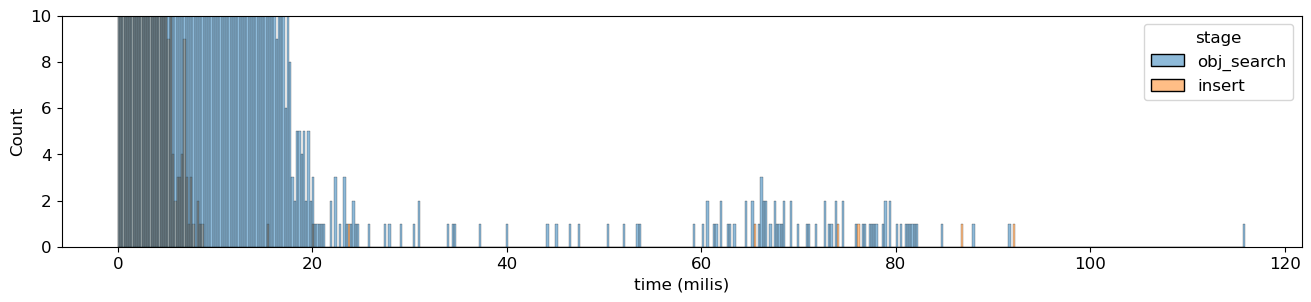

In [3]:
plt.figure(figsize=(16,3))
sns.histplot(x='time', bins=500, hue='stage', multiple='layer', data=create_time)
plt.xlabel('time (milis)')
plt.ylim(0, 10)

**Miserable queries**

Queries that takes too much time (>100 milis). 

In [4]:
miserable_queries = create_time[create_time['time'] > 5].sort_values('time', ascending=False)
miserable_queries

,index,name,ar,des_count,stage,time
1801456,2036995,fast,252.049920,0,obj_search,115.935186
4299158,2360931,fast,9.670045,2,insert,92.090436
1302712,1472917,fast,23.188116,0,obj_search,91.710163
2191955,2478293,fast,22.590459,0,obj_search,88.010724
4377613,2449636,fast,0.492299,3,insert,86.738138
...,...,...,...,...,...,...
1131352,1279034,fast,89.120789,0,obj_search,5.001584
23576,26614,fast,24.837742,0,obj_search,5.000712
1530614,1730459,fast,121.812408,0,obj_search,5.000693
777268,878550,fast,65.435706,0,obj_search,5.000183


In [5]:
# step = 500000
# for i in range(0, 2500000, step):
# plt.figure(figsize=(16,3))
# sns.lineplot(x='index', y='time', hue='stage', style='stage', data=create_time)
# plt.xlabel('timestamp')
# plt.ylabel('time (milis)')

Relative time (FAST vs CkQST)

In [6]:
# relative_create = create_time[create_time['stage'] == 'insert']['time'].reset_index() - create_time[create_time['stage'] == 'obj_search']['time'].reset_index()
# relative_create
# plt.figure(figsize=(16,8))
# sns.lineplot(data=relative_create)
# plt.xlabel('timestamp')
# plt.ylabel('time (milis)')

## Load Queries

In [7]:
queries_df = pd.read_json('../../data/exported/places_o200000_q2500000_scaled.json', lines=True);
queries_df = queries_df.iloc[200000:, :].reset_index(drop=True).drop(columns=['id']).reset_index()

queries_df.tail()

,index,x,y,keywords,scaled
2499995,2499995,409.894898,103.097463,"[telephone, cellular]",True
2499996,2499996,402.284307,107.998284,[contractor],True
2499997,2499997,406.953882,110.040834,[church],True
2499998,2499998,412.621720,107.253521,"[lounge, drinking, eating, cocktail]",True
2499999,2499999,412.835319,107.262331,"[coping, plastering, tiling, pool, swimming]",True


### Properties of miserable queries

In [8]:
queries_df.shape

(2500000, 5)

In [9]:
details = queries_df.join(miserable_queries.set_index('index'), on='index').dropna().sort_values('time', ascending=False)
# details = details[details['name'] == 'fast']
inf_val = details['ar'].max()
details['ar'] = details['ar'].apply(lambda x: np.inf if x >= inf_val else x)
all = details.drop(columns=['x', 'y']).rename(columns={'time': 'insertion time (milis)'})

In [10]:
obj_search = all[all['stage'] == 'obj_search']
insert = all[all['stage'] == 'insert']

# insert#.join(ckqsts, rsuffix='_')
insert.head(25)
# all.head(25)

,index,keywords,scaled,name,ar,des_count,stage,insertion time (milis)
2360931,2360931,"[car, dealer]",True,fast,9.670045,2.0,insert,92.090436
2449636,2449636,"[field, oil]",True,fast,0.492299,3.0,insert,86.738138
1918844,1918844,[mfg],True,fast,0.596251,1.0,insert,76.178699
1770830,1770830,[investor],True,fast,0.483426,8.0,insert,74.194520
632983,632983,"[book, rare, dealer]",True,fast,2.128098,1.0,insert,65.526498
13932,13932,[accountant],True,fast,5.992836,0.0,insert,23.759392
1472995,1472995,[television],True,fast,0.119184,2.0,insert,19.997570
2314061,2314061,"[design, system]",True,fast,10.107391,1.0,insert,15.385632
2357806,2357806,[doughnut],True,fast,5.771833,1.0,insert,8.727092
2214306,2214306,[apartment],True,fast,4.204608,1.0,insert,8.366742


In [11]:
obj_search.head(25)

,index,keywords,scaled,name,ar,des_count,stage,insertion time (milis)
2036995,2036995,"[lawn, garden]",True,fast,252.049920,0.0,obj_search,115.935186
1472917,1472917,"[paging, answering]",True,fast,23.188116,0.0,obj_search,91.710163
2478293,2478293,[paint],True,fast,22.590459,0.0,obj_search,88.010724
2007278,2007278,[handyman],True,fast,218.426641,0.0,obj_search,84.826383
2330573,2330573,"[commercial, storage]",True,fast,12.792734,0.0,obj_search,82.249765
2419782,2419782,[establishment],True,fast,13.232156,0.0,obj_search,81.959458
2390405,2390405,"[automobile, lubrication]",True,fast,1.624963,0.0,obj_search,81.810990
2300915,2300915,"[merchandise, general]",True,fast,252.376809,0.0,obj_search,81.546850
2271804,2271804,"[machine, shop]",True,fast,97.143371,0.0,obj_search,81.316868
2095468,2095468,"[supply, help, engineer]",True,fast,1.129818,0.0,obj_search,81.065745


### Extract Inf

In [12]:
inf_queries = obj_search[obj_search['ar'] == np.inf]
inf_queries.shape

(1, 8)

In [13]:
# inf_queries['index'].to_csv('../../data/exported/places_o200000_q2500000_scaled.inf.csv')

##### 